<a href="https://colab.research.google.com/github/sumitsingh3072/stock-price-prediction/blob/main/BTC_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Getting Data
data = yf.download('BTC-USD','2014-01-01','2024-08-24')


[*********************100%%**********************]  1 of 1 completed


In [5]:
data = pd.DataFrame(data)

In [6]:
data.reset_index(inplace=True)

In [7]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [8]:
data

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
3624,59493.453125
3625,59012.792969
3626,61175.191406
3627,60381.914062


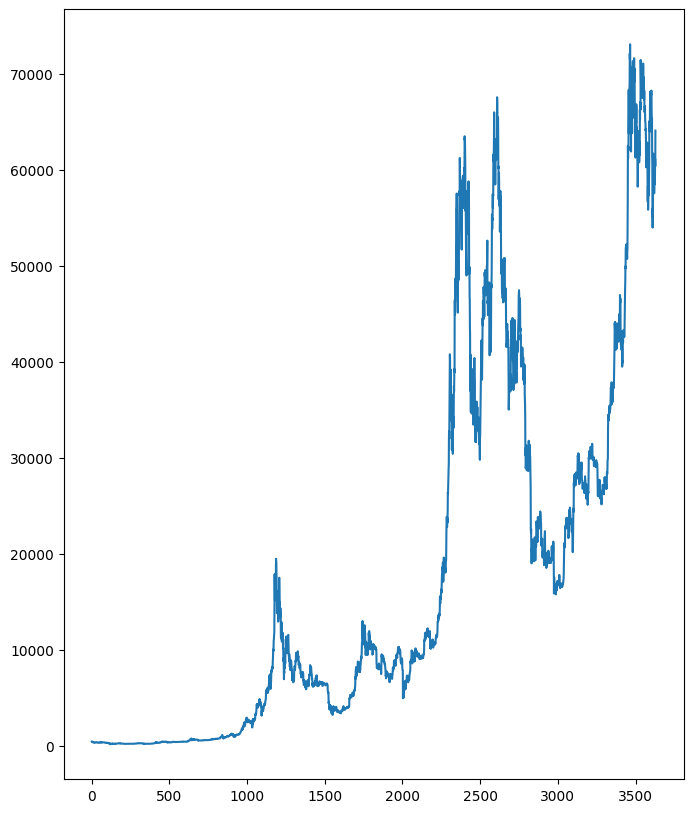

In [9]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [10]:
train_data = data[:-100]
test_data = data[-100:]

In [11]:
train_data.shape

(3529, 1)

In [12]:
test_data.shape

(100, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
train_data_scale = scaler.fit_transform(train_data)

In [15]:
base_days = 100

In [16]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [19]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [23]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - loss: 0.0357
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - loss: 0.0054
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0044
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0049
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0041
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0034
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0034
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0034
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0032
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0036
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0030
Epoch 12/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0032
Epoch 13/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0028
Epoch 14/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0030
Epoch 15/50
108/108 ━━━━━━━━━━━━━━━━━━

In [24]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [25]:
test_data

,Close
0,43084.671875
1,44318.222656
2,45301.566406
3,47147.199219
4,47771.277344
...,...
195,59493.453125
196,59012.792969
197,61175.191406
198,60381.914062


In [26]:
test_data_scale = scaler.transform(test_data)

In [27]:
x = []
y = []

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [30]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step


In [31]:
pred = scaler.inverse_transform(pred)

In [32]:
pred

array([[60444.938],
       [61430.277],
       [62398.914],
       [63081.23 ],
       [63301.2  ],
       [63750.297],
       [64234.344],
       [64496.62 ],
       [64383.16 ],
       [64115.38 ],
       [63966.633],
       [63932.965],
       [64102.516],
       [64262.477],
       [64259.035],
       [64206.445],
       [64055.5  ],
       [63890.18 ],
       [63772.684],
       [63851.26 ],
       [64266.047],
       [64879.746],
       [65393.375],
       [65498.934],
       [65255.01 ],
       [64888.035],
       [64574.168],
       [64176.484],
       [63904.277],
       [63662.543],
       [63397.71 ],
       [63179.89 ],
       [63104.633],
       [63134.227],
       [63044.527],
       [62810.566],
       [62497.21 ],
       [62121.273],
       [61796.62 ],
       [61473.31 ],
       [60867.64 ],
       [60280.215],
       [59781.586],
       [59549.605],
       [59427.203],
       [59413.2  ],
       [59677.426],
       [60124.63 ],
       [60455.332],
       [60338.785],


In [33]:
## Predicting Future BTC price
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [34]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [35]:
z

array([[59600.16871537],
       [59877.2899599 ],
       [59657.53801021],
       [59105.82460231],
       [58426.04060986],
       [57769.85268398],
       [57224.3881055 ],
       [56819.82202845],
       [56546.05551014],
       [56370.86232043],
       [56255.3415407 ],
       [56164.57273063],
       [56073.11733152],
       [55966.45268139],
       [55839.65967391],
       [55694.84153122],
       [55538.13409974],
       [55377.08985897],
       [55218.69637338],
       [55068.21169832],
       [54928.74721199],
       [54801.37190748],
       [54685.54694273],
       [54579.76008366],
       [54482.09061913],
       [54390.60914701],
       [54303.7425962 ],
       [54220.31768162],
       [54139.63912323],
       [54061.37666299]])

In [36]:
model.save('Bitcoin_Price_prediction_Model.keras')